In [1]:
import pandas as pd
batting = pd.read_csv('../Desktop/baseballdatabank-2017.1/core/batting.csv')

http://www.seanlahman.com/baseball-archive/statistics/

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [5]:
batting.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0
102815,zychto01,2016,1,SEA,AL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
batting['seasons'] = batting['stint'].map(lambda x: x if x == 1 else 0)

In [5]:
def year_correct(row):
    if row['stint'] != 1:
        return 0
    else:
        return row['yearID']

In [6]:
batting['year_rect'] = batting.apply(year_correct, axis = 1)

In [7]:
players = batting.groupby('playerID').sum()

In [10]:
players[players.index == 'aaronha01']

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,...,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,23,45195


In [8]:
players['avg'] = players['H'] / players['AB']
players[players.index == 'rosepe01']

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg
playerID,,,,,,,,,,,,,,,,,,,,,
rosepe01,49372,26,3562,14053,2165,4256,746,135,160,1314.0,...,1566,1143.0,167.0,107.0,56.0,79.0,247.0,24,47388,0.302853


In [9]:
players['slg'] = (players['H'] + players['2B'] + 2 * players['3B'] + 3 * players['HR']) / players['AB']

In [13]:
players.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SO,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,18084,9,331,4,0,0,0,0,0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,9,18084,0.000000,0.000000
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,...,1383.0,293.0,32.0,21.0,121.0,328.0,23,45195,0.304998,0.554513
aaronto01,13768,7,437,944,102,216,42,6,13,94.0,...,145.0,3.0,0.0,9.0,6.0,36.0,7,13768,0.228814,0.327331
aasedo01,25786,13,448,5,0,0,0,0,0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13,25786,0.000000,0.000000
abadan01,6010,3,15,21,1,2,0,0,0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,3,6010,0.095238,0.095238


In [14]:
players['avg'].sort_values()

playerID
aardsda01    0.0
fritzch01    0.0
saitota01    0.0
capeljo01    0.0
capelmi01    0.0
saipemi01    0.0
luhrswi01    0.0
cappuge01    0.0
lukacro01    0.0
frierer01    0.0
capripa01    0.0
caprora01    0.0
lukenal01    0.0
lusher01     0.0
saenzch01    0.0
friedbo01    0.0
cardico01    0.0
sadowji01    0.0
lynchto02    0.0
sadleca02    0.0
salasfe01    0.0
salazda01    0.0
salisbi01    0.0
luebbro01    0.0
lowema01     0.0
campisa01    0.0
fuentbr01    0.0
campojo01    0.0
samuero01    0.0
samuejo01    0.0
            ... 
wrighch01    NaN
wrighji02    NaN
wrighji03    NaN
wurmfr01     NaN
yabutya01    NaN
yarnaed01    NaN
yateski01    NaN
yeabsbe01    NaN
yettri01     NaN
ynoami01     NaN
yochira01    NaN
youngcl01    NaN
youngda01    NaN
youngki01    NaN
youngma03    NaN
youngti01    NaN
yountla01    NaN
zagurmi01    NaN
zaratma01    NaN
zaskeje01    NaN
zavadcl01    NaN
zavarcl01    NaN
zelleba01    NaN
ziemst01     NaN
zimmeje02    NaN
zimmejo01    NaN
zinkch01     NaN
zinse

# Batting Average

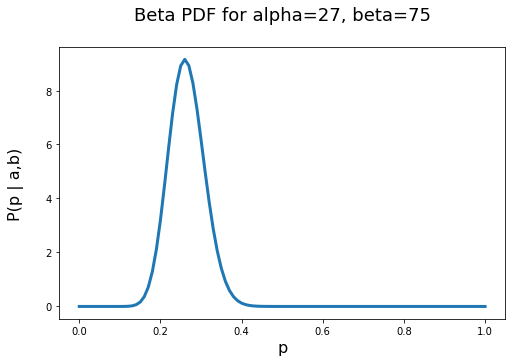

In [17]:
# Prior

successes = 26
failures = 74
alpha_prior = successes + 1
beta_prior = failures + 1

beta_dist = stats.beta(alpha_prior, beta_prior)

fig, ax = plt.subplots(figsize=(8, 5))
pvals = np.linspace(0, 1, 101)
prior = beta_dist.pdf(pvals)

ax.plot(pvals, prior, lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p | a,b)\n', fontsize=16)
ax.set_title('Beta PDF for alpha={}, beta={}\n'.format(alpha_prior, beta_prior), fontsize=18)
plt.show()

In [10]:
# A:

players['MAP'] = (players['H'] + 26) / (players['AB'] + 100)

In [11]:
players.sort_values('MAP', ascending = False).head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP
playerID,,,,,,,,,,,,,,,,,,,,,
cobbty01,45996,24,3035,11434,2246,4189,724,295,117,1937.0,...,0.0,94.0,295.0,0.0,0.0,24,45996,0.366363,0.511982,0.365441
hornsro01,46231,25,2259,8173,1579,2930,541,169,301,1584.0,...,0.0,48.0,216.0,0.0,3.0,23,44298,0.358497,0.576532,0.357307
barnero01,16878,9,499,2392,698,859,144,44,6,350.0,...,0.0,0.0,0.0,0.0,0.0,9,16878,0.359114,0.463629,0.355136
jacksjo01,26797,15,1332,4981,873,1772,307,168,54,785.0,...,0.0,59.0,131.0,0.0,0.0,13,24882,0.355752,0.517366,0.353867
meyerle01,15002,8,307,1443,306,513,86,31,10,279.0,...,0.0,0.0,0.0,0.0,0.0,8,15002,0.355509,0.478863,0.349320


In [12]:
players = players.reset_index()

In [13]:
players = players.rename({'MAP': 'MAP_avg'}, axis = 1)

players['Era'] = (players['year_rect'] / players['seasons']).astype(int)

In [25]:
players[players['avg'] == max(players['avg'])].head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
31,abramge01,1923,1,3,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1923,1.0,1.0,0.260148,1923
705,banisje01,1991,1,1,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1991,1.0,1.0,0.260148,1991
867,bartocl01,4009,2,53,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,2,4009,1.0,1.0,0.260148,2004
884,bassdo01,1918,1,2,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1,1918,1.0,1.0,0.260148,1918
1227,berrijo01,2016,1,14,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1,2016,1.0,1.0,0.260148,2016


In [14]:
def avg_prior(h, ab):
    players['MAP_avg'] = (players['H'] + h) / (players['AB'] + ab)
    return players.sort_values('MAP_avg',
                               # ascending = False
                              ).head(1)['playerID']

In [20]:
worst = []
for i in range(10, 5001, 10):
    worst.append(avg_prior(0.26 * i, i))

In [42]:
worst[169]

2151    buhlbo01
Name: playerID, dtype: object

In [32]:
worst[170]

1181    bergebi01
Name: playerID, dtype: object

In [40]:
avg_prior(0.26 * 1704, 1704)

2151    buhlbo01
Name: playerID, dtype: object

In [41]:
avg_prior(0.26 * 1705, 1705)

1181    bergebi01
Name: playerID, dtype: object

In [21]:
worst

[7445    herbero01
 Name: playerID, dtype: object, 7445    herbero01
 Name: playerID, dtype: object, 7445    herbero01
 Name: playerID, dtype: object, 7445    herbero01
 Name: playerID, dtype: object, 7445    herbero01
 Name: playerID, dtype: object, 7445    herbero01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object, 2839    chancde01
 Name: playerID, dtype: object,

In [35]:
players[players['playerID'] == 'herbero01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era,MAP
7445,herbero01,19673,11,332,206,6,6,2,0,0,...,11.0,0.0,2.0,9,17703,0.029126,0.038835,0.104575,1967,0.250864


Ron Herbel: pitcher for the San Francisco Giants, San Diego Padres, New York Mets, and Atlanta Braves.

In [36]:
players[players['playerID'] == 'chancde01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era,MAP
2839,chancde01,23596,13,406,662,17,44,2,0,0,...,61.0,1.0,2.0,11,21626,0.066465,0.069486,0.091864,1966,0.237372


Dean Chance: pitcher for the Los Angeles / California Angels, Minnesota Twins, Cleveland Indians, New York Mets, and Detroit Tigers.

In [38]:
players[players['playerID'] == 'buhlbo01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era,MAP
2151,buhlbo01,33328,19,457,857,31,76,2,0,0,...,53.0,2.0,10.0,15,29400,0.088681,0.091015,0.106583,1960,0.234933


Bob Buhl: pitcher for the Milwaukee Braves, Chicago Cubs, and Philadelphia Phillies.

In [37]:
players[players['playerID'] == 'bergebi01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era,MAP
1181,bergebi01,20966,11,947,3028,138,516,45,21,2,...,112.0,0.0,0.0,11,20966,0.17041,0.201123,0.173274,1906,0.226208


Bill Bergen: Cincinnati Reds and Brooklyn Superbas / Dodgers.

In [55]:
best = []
for i in range(10, 5001, 10):
    best.append(avg_prior(0.26 * i, i))

best

[8319    jansera01
 Name: playerID, dtype: object, 15591    sherlvi01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01
 Name: playerID, dtype: object, 3155    cobbty01

In [56]:
players[players['playerID'] == 'jansera01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
8319,jansera01,1910,1,1,5,0,4,0,0,0,...,0.0,0.0,0.0,0.0,1,1910,0.8,0.8,0.260539,1910


Ray Jansen: St. Louis Browns.

In [57]:
players[players['playerID'] == 'sherlvi01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
15591,sherlvi01,1935,1,9,26,4,12,1,0,0,...,0.0,0.0,0.0,0.0,1,1935,0.461538,0.5,0.261043,1935


Vince Sherlock: Brooklyn Dodgers.

In [59]:
players[players['playerID'] == 'cobbty01']

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,seasons,year_rect,avg,slg,MAP_avg,Era
3155,cobbty01,45996,24,3035,11434,2246,4189,724,295,117,...,94.0,295.0,0.0,0.0,24,45996,0.366363,0.511982,0.334003,1916


Looking for non-pitchers:

In [62]:
avg_prior(26, 100)

2839     chancde01
7445     herbero01
2151      buhlbo01
15562    sheetbe01
4929     ellswdi01
6975     handsbi01
9744     leiteal01
9282     koufasa01
11714    moehlbr01
3590     craigro01
Name: playerID, dtype: object

Ben Sheets: pitcher for the Milwaukee Brewers, Oakland Athletics, and Atlanta Braves.

Dick Ellsworth: pitcher for the Chicago Cubs, Philadelphia Phillies, Boston Red Sox, Cleveland Indians, and Milwaukee Brewers.

Bill Hands: pitcher for the San Francisco Giants, Chicago Cubs, Minnesota Twins, and Texas Rangers.

Al Leiter: pitcher for the New York Yankees, Toronto Blue Jays, Florida Marlins, and New York Mets.

Sandy Koufax: pitcher for the Brooklyn / Los Angeles Dodgers.

Brian Moehler: pitcher for the Detroit Tigers, Cincinnati Reds, Houston Astros, and Florida Marlins.

Roger Craig: pitcher for the Brooklyn / Los Angeles Dodgers, New York Mets, St. Louis Cardinals, Cincinnati Reds, and Philadelphia Phillies.

In [63]:
avg_prior(52, 200)

2839     chancde01
2151      buhlbo01
4929     ellswdi01
9282     koufasa01
6975     handsbi01
15562    sheetbe01
9744     leiteal01
7021     haranaa01
2215     burkejo03
14893     ryanno01
Name: playerID, dtype: object

Aaron Harang: pitcher for the Oakland Athletics, Cincinnati Reds, San Diego Padres, Los Angeles Dodgers, Seattle Mariners, New York Mets, Atlanta Braves, and Philadelphia Phillies.

John Burkett: pitcher for the San Francisco Giants, Florida Marlins, Texas Rangers, Atlanta Braves, and Boston Red Sox.

Nolan Ryan: pitcher for the New York Mets, California Angels, Houston Astros, and Texas Rangers.

In [64]:
avg_prior(78, 300)

2839     chancde01
2151      buhlbo01
4929     ellswdi01
9282     koufasa01
7021     haranaa01
9744     leiteal01
6975     handsbi01
14893     ryanno01
15562    sheetbe01
10027    lolicmi01
Name: playerID, dtype: object

Mickey Lolich: pitcher for the Detroit Tigers, New York Mets, and San Diego Padres.

In [65]:
avg_prior(104, 400)

2839     chancde01
2151      buhlbo01
4929     ellswdi01
9282     koufasa01
5700     frienbo01
7021     haranaa01
14893     ryanno01
10027    lolicmi01
9744     leiteal01
12988    pappami01
Name: playerID, dtype: object

Bob Friend: pitcher for the Pittsburgh Pirates, New York Yankees, and New York Mets.

Milt Pappas: pitcher for the Baltimore Orioles, Cincinnati Reds, Atlanta Braves, and Chicago Cubs.

In [68]:
avg_prior(130, 500)

2839     chancde01
2151      buhlbo01
9282     koufasa01
4929     ellswdi01
5700     frienbo01
14893     ryanno01
10027    lolicmi01
12988    pappami01
7021     haranaa01
9253     koosmje01
Name: playerID, dtype: object

Jerry Koosman: pitcher for the New York Mets, Minnesota Twins, Chicago White Sox, and Philadelphia Phillies.

In [15]:
pitching = pd.read_csv('../Desktop/baseballdatabank-2017.1/core/pitching.csv')

In [16]:
pitching['playerID'].values

array(['bechtge01', 'brainas01', 'fergubo01', ..., 'zieglbr01',
       'zimmejo02', 'zychto01'], dtype=object)

In [17]:
pitchers = pitching.groupby('playerID').sum()

In [18]:
pure_bats = [player for player in players['playerID'] if player not in pitching['playerID'].values]

In [19]:
def also_pitch(x):
    if x['playerID'] in pure_bats:
        return 0
    else:
        return 1

In [20]:
players['no_pitch'] = players.apply(also_pitch, axis = 1)

In [21]:
pure_batters = players[players['no_pitch'] == 0]

In [22]:
def avg_prior_pure(h, ab):
    pure_batters['MAP_avg'] = (pure_batters['H'] + h) / (pure_batters['AB'] + ab)
    return pure_batters.sort_values('MAP_avg',
                               # ascending = False
                              ).head(1)['playerID']

In [75]:
worst = []
for i in range(10, 5001, 10):
    worst.append(avg_prior_pure(0.26 * i, i))

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [76]:
worst

[15575    sheltsk01
 Name: playerID, dtype: object, 15575    sheltsk01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 5982    gastfed01
 Name: playerID, dtype: object, 8646    jordami01
 Name: playerID, dtype: object, 8087    humphjo01
 Name: playerID, dtype: object, 8087    humphjo01
 Name: playerID, dtype: object, 8087    humphjo01
 Name: playerID, dtype: object, 8087    humphjo01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: object, 1181    bergebi01
 Name: playerID, dtype: objec

Skeeter Shelton: New York Yankees.

Ed Gastfield: Detroit Wolverines and Chicago White Stockings.

Mike Jordan: Pittsburgh Alleghenys.

John Humphries: New York Gothams and Washington Nationals.

In [29]:
avg_prior_pure(0.26 * 132, 132)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


8087    humphjo01
Name: playerID, dtype: object

In [28]:
avg_prior_pure(0.26 * 133, 133)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1181    bergebi01
Name: playerID, dtype: object